<a href="https://colab.research.google.com/github/nv-hiep/ML/blob/main/Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decison Trees

https://www.youtube.com/watch?v=XU5pw3QRYjQ&ab_channel=freeCodeCamp.org

**Features**

Age: age of the patient (years)

BMI: body mass index (kg/m2)

Glucose: glucose concentration in blood (mg/dL)

Insulin: insulin concentration in blood (microU/mL)

HOMA: homeostatic model assessment of insulin resistance (glucose times insulin)

Leptin: concentration of leptin - hormone of energy expenditure (ng/mL)

Adiponectin: concentration of adiponectin - protein regulating glucose level (micro g/mL)

Resistin: concentration of resistin - protein secreted by adipose tissue (ng/mL)

MCP.1: concentration of MCP.1 - protein that recruits monocytes to the sites of inflammation due to tissue injure or inflammation (pg/dL)

Classification: Healthy (1) or patient (2)

# Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [ ]:
datapath = 'breastCancer.csv'
df = pd.read_csv(datapath)
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


2    64
1    52
Name: Classification, dtype: int64
2    0.551724
1    0.448276
Name: Classification, dtype: float64


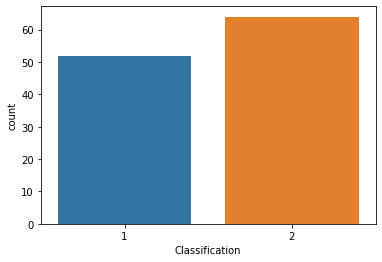

In [ ]:
labels = df['Classification']
print(labels.value_counts())
print(labels.value_counts(normalize=True))
sns.countplot(x=labels, data=df)
plt.show()

## Violin plots of features

In [ ]:
def violin_plots(x, features):
  for i,col in enumerate(features):
    sns.violinplot(x=x, y=col, data=df)   
    plt.title(f"{col} vs {x}")
    plt.show()

In [ ]:
x = df.columns[-1]
y = df.columns[:-1]

print(x)
print(y)

Classification
Index(['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin',
       'Resistin', 'MCP.1'],
      dtype='object')


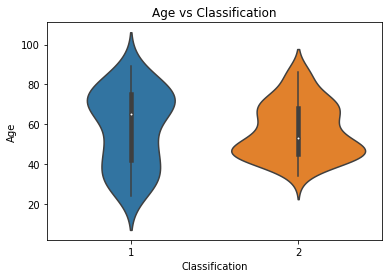

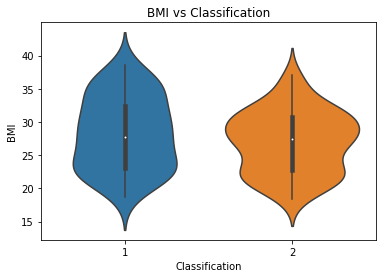

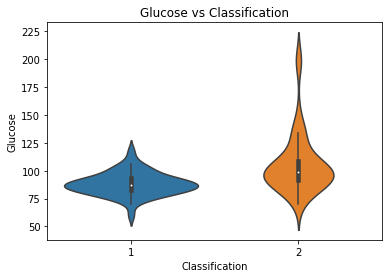

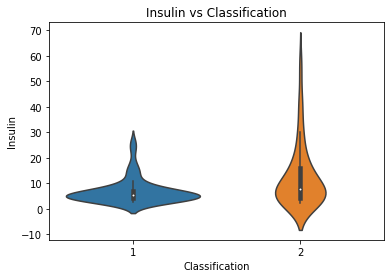

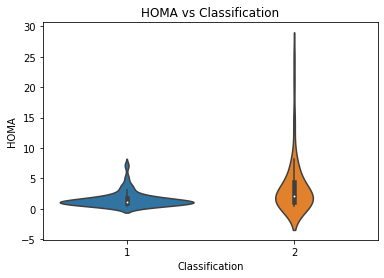

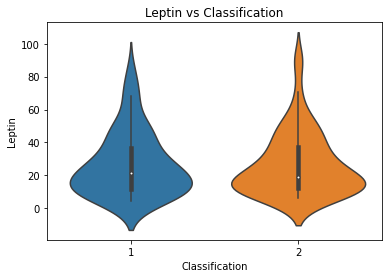

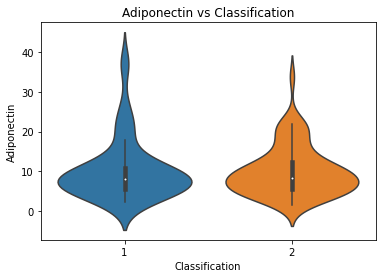

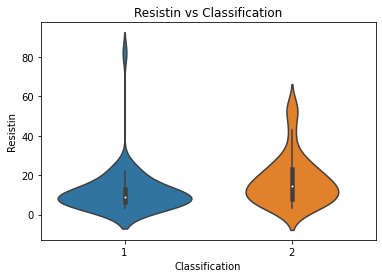

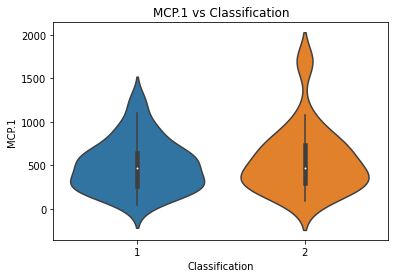

In [ ]:
# sns.violinplot(x='Classification', y='BMI', data=df)
# plt.title('BMI vs Classification')
# plt.show()

violin_plots(x, y)

Check NULL values

In [ ]:
# df.isnull().sum()

for c in df.columns:
  print(f"{c} : {df[c].isnull().sum()}")

Age : 0
BMI : 0
Glucose : 0
Insulin : 0
HOMA : 0
Leptin : 0
Adiponectin : 0
Resistin : 0
MCP.1 : 0
Classification : 0


No NULL values. Good!

# Preprocessing

In [ ]:
from sklearn.preprocessing import  LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
le = LabelEncoder()

labels = le.fit_transform(df['Classification'])

# 0: healthy, 1: patient
print(labels.shape)
np.unique(labels, return_counts=True)

(116,)


(array([0, 1]), array([52, 64]))

In [ ]:
y = labels.reshape(-1, 1)
X = df.drop(['Classification'], axis=1).values
print(y.shape)
print(X.shape)

(116, 1)
(116, 9)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Baseline Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
dt_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


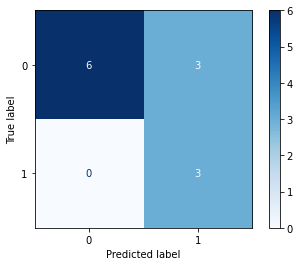

In [ ]:
plot_confusion_matrix(dt_clf, X_test, y_test, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

In [ ]:
pred = dt_clf.predict(X_test)
confusion_matrix(y_test, pred)

array([[6, 3],
       [0, 3]])

In [ ]:
from sklearn.tree import plot_tree

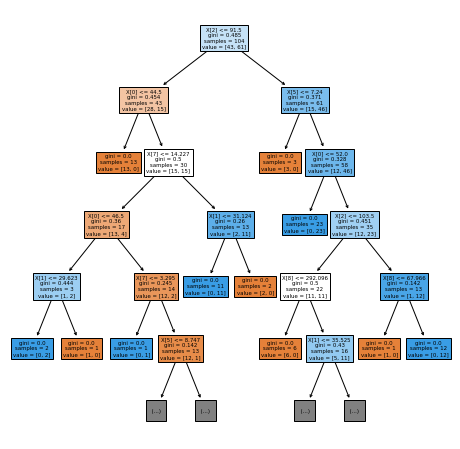

In [ ]:
plt.figure(figsize=(8,8))
plot_tree(dt_clf, max_depth=5, filled=True)
plt.show()

# Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
bag_clf = BaggingClassifier()
bag_clf.fit(X_train, y_train.ravel())

BaggingClassifier()

In [ ]:
bag_clf.get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
pred = bag_clf.predict(X_test)
confusion_matrix(y_test, pred)

array([[8, 1],
       [1, 2]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


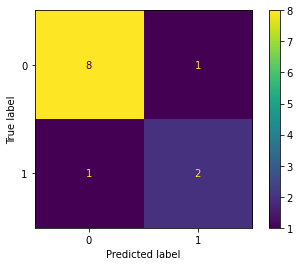

In [ ]:
plot_confusion_matrix(bag_clf, X_test, y_test)
plt.grid(False)
plt.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train.ravel())

RandomForestClassifier()

In [ ]:
rf_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


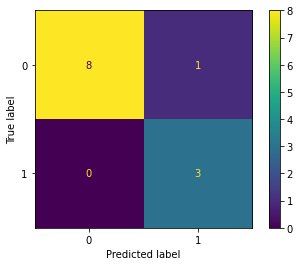

In [ ]:
plot_confusion_matrix(rf_clf, X_test, y_test)
plt.grid(False)
plt.show()

# Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train.ravel())

GradientBoostingClassifier()

In [ ]:
gb_clf.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


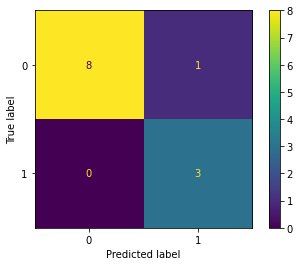

In [ ]:
plot_confusion_matrix(gb_clf, X_test, y_test)
plt.grid(False)
plt.show()